# BA Challenge 2020

### Importing relevant modules for the challenge

In [1]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Reading the excel file
xls=pd.read_excel('Cities.xls')
#Writing the excel file to a csv
xls.to_csv('Cities.csv')
#reading the csv file
df = pd.read_csv('Cities.csv')

In [3]:
#df = pd.read_csv('Cities.csv')

In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,City,cityID,clusterID,Typology,Country,Car Modeshare (%),Public Transit Modeshare (%),Bicycle Modeshare (%),...,Highway Proportion,Metro Propensity Factor,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor
0,0,284,Baltimore(MD),285,7,Auto Sprawl,United States,85.0,6.1,0.3,...,0.041018,0.160848,0.176867,0.360637,0.796264,0.355964,0.081956,0.180085,0.722163,0.425187
1,1,9,Melbourne,10,8,Auto Innovative,Australia,80.0,14.0,2,...,0.014489,0.060387,0.168335,0.363675,0.786174,0.397894,0.082267,0.333173,0.539355,0.558910
2,2,185,Niamey,186,1,Congested Emerging,Niger,NaN,9.0,2,...,0.000000,0.036220,0.010915,0.343161,0.000000,0.273646,0.248398,0.655464,0.275605,0.410312
3,3,327,Hanoi,328,12,MetroBike Emerging,Vietnam,8.0,10.0,2,...,0.022938,0.078028,0.084511,0.358868,0.157676,0.509057,0.292564,0.624623,0.666710,0.239113
4,4,66,Urumqi,67,12,MetroBike Emerging,China,21.7,54.7,NaN,...,0.060128,0.103334,0.447261,0.392551,0.287235,0.801464,0.322960,0.586019,0.791822,0.075617


In [5]:
#Dropping colums 
df=df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
df

,City,cityID,clusterID,Typology,Country,Car Modeshare (%),Public Transit Modeshare (%),Bicycle Modeshare (%),Walking Modeshare (%),Gasoline Pump Price (USD/liter),...,Highway Proportion,Metro Propensity Factor,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor
0,Baltimore(MD),285,7,Auto Sprawl,United States,85.0,6.1,0.3,2.6,0.66,...,0.041018,0.160848,0.176867,0.360637,0.796264,0.355964,0.081956,0.180085,0.722163,0.425187
1,Melbourne,10,8,Auto Innovative,Australia,80.0,14.0,2,4.0,1.11,...,0.014489,0.060387,0.168335,0.363675,0.786174,0.397894,0.082267,0.333173,0.539355,0.558910
2,Niamey,186,1,Congested Emerging,Niger,NaN,9.0,2,60.0,1.02,...,0.000000,0.036220,0.010915,0.343161,0.000000,0.273646,0.248398,0.655464,0.275605,0.410312
3,Hanoi,328,12,MetroBike Emerging,Vietnam,8.0,10.0,2,NaN,0.90,...,0.022938,0.078028,0.084511,0.358868,0.157676,0.509057,0.292564,0.624623,0.666710,0.239113
4,Urumqi,67,12,MetroBike Emerging,China,21.7,54.7,NaN,NaN,1.16,...,0.060128,0.103334,0.447261,0.392551,0.287235,0.801464,0.322960,0.586019,0.791822,0.075617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,Durban,226,2,BusTransit Sprawl,South Africa,NaN,NaN,NaN,NaN,1.19,...,0.022637,0.061198,0.156362,0.396614,0.290151,0.313774,0.170036,0.354154,0.625981,0.351314
327,Kumasi,104,1,Congested Emerging,Ghana,NaN,NaN,NaN,NaN,1.05,...,0.000000,0.078950,0.047145,0.353806,0.067988,0.334280,0.230617,0.690295,0.364002,0.318483
328,Izmir,251,5,Hybrid Moderate,Turkey,NaN,NaN,NaN,NaN,1.47,...,0.015341,0.080428,0.091029,0.423641,0.341371,0.350372,0.168693,0.451607,0.261410,0.458581
329,Ankara,250,6,Hybrid Giant,Turkey,NaN,NaN,NaN,NaN,1.48,...,0.011222,0.253807,0.089038,0.418830,0.348147,0.446006,0.200077,0.449898,0.308770,0.501365


In [6]:
df.shape

(331, 78)

In [7]:
#checking the Statistics for our data set
df.describe()

,cityID,clusterID,Car Modeshare (%),Public Transit Modeshare (%),Walking Modeshare (%),Gasoline Pump Price (USD/liter),Road Deaths Rate (per 1000),Subway Length (km),Subway Length Density (per km),Subway Stations per Hundred Thousand,...,Highway Proportion,Metro Propensity Factor,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor
count,331.000000,331.000000,224.000000,227.000000,199.000000,331.000000,330.000000,331.000000,331.000000,331.000000,...,317.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,166.000000,5.567976,47.688694,25.999218,18.270352,1.053988,14.707576,38.872356,0.037598,0.729446,...,0.016953,0.195855,0.173344,0.398780,0.416785,0.381920,0.171709,0.491645,0.492904,0.412400
std,95.695698,3.591750,28.588289,20.319709,15.845304,0.424823,8.718870,77.291871,0.068359,1.224042,...,0.016285,0.195584,0.148059,0.078614,0.266073,0.153003,0.159347,0.189305,0.227212,0.151951
min,1.000000,1.000000,0.000000,0.400000,0.000000,0.010000,0.600000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,83.500000,2.000000,22.475000,9.000000,3.200000,0.705000,7.500000,0.000000,0.000000,0.000000,...,0.000756,0.067857,0.078734,0.358541,0.213589,0.281133,0.055895,0.366844,0.309768,0.319600
50%,166.000000,6.000000,43.000000,22.200000,16.000000,1.050000,13.950000,0.000000,0.000000,0.000000,...,0.014996,0.106605,0.139255,0.390862,0.341371,0.341087,0.120180,0.533182,0.473091,0.394053
75%,248.500000,8.000000,75.650000,39.650000,27.000000,1.315000,20.450000,42.550000,0.052714,1.137465,...,0.026980,0.277798,0.190673,0.423609,0.706330,0.450211,0.248221,0.640847,0.679550,0.474617
max,331.000000,12.000000,94.800000,82.500000,78.000000,2.120000,37.200000,588.000000,0.612982,9.797980,...,0.082444,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#Counting the number of missing values "NaN" - NB! cells with the value "0" is not counted as "NaN"  
missing_data = df.isnull()
missing_data.head(10)

,City,cityID,clusterID,Typology,Country,Car Modeshare (%),Public Transit Modeshare (%),Bicycle Modeshare (%),Walking Modeshare (%),Gasoline Pump Price (USD/liter),...,Highway Proportion,Metro Propensity Factor,BRT Propensity Factor,BikeShare Propensity Factor,Development Factor,Sustainability Factor,Population Factor,Congestion Factor,Sprawl Factor,Network Density Factor
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False


### True = Missing values, False = Not missing values

In [9]:
#creating af list for each column with the distribution of True/False
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  
    

City
False    331
Name: City, dtype: int64

cityID
False    331
Name: cityID, dtype: int64

clusterID
False    331
Name: clusterID, dtype: int64

Typology
False    331
Name: Typology, dtype: int64

Country
False    331
Name: Country, dtype: int64

Car Modeshare (%)
False    224
True     107
Name: Car Modeshare (%), dtype: int64

Public Transit Modeshare (%)
False    227
True     104
Name: Public Transit Modeshare (%), dtype: int64

Bicycle Modeshare (%)
False    185
True     146
Name: Bicycle Modeshare (%), dtype: int64

Walking Modeshare (%)
False    199
True     132
Name: Walking Modeshare (%), dtype: int64

Gasoline Pump Price (USD/liter)
False    331
Name: Gasoline Pump Price (USD/liter), dtype: int64

Road Deaths Rate (per 1000)
False    330
True       1
Name: Road Deaths Rate (per 1000), dtype: int64

Subway Length (km)
False    331
Name: Subway Length (km), dtype: int64

Subway Length Density (per km)
False    331
Name: Subway Length Density (per km), dtype: int64

Subway Statio

<BarContainer object of 78 artists>

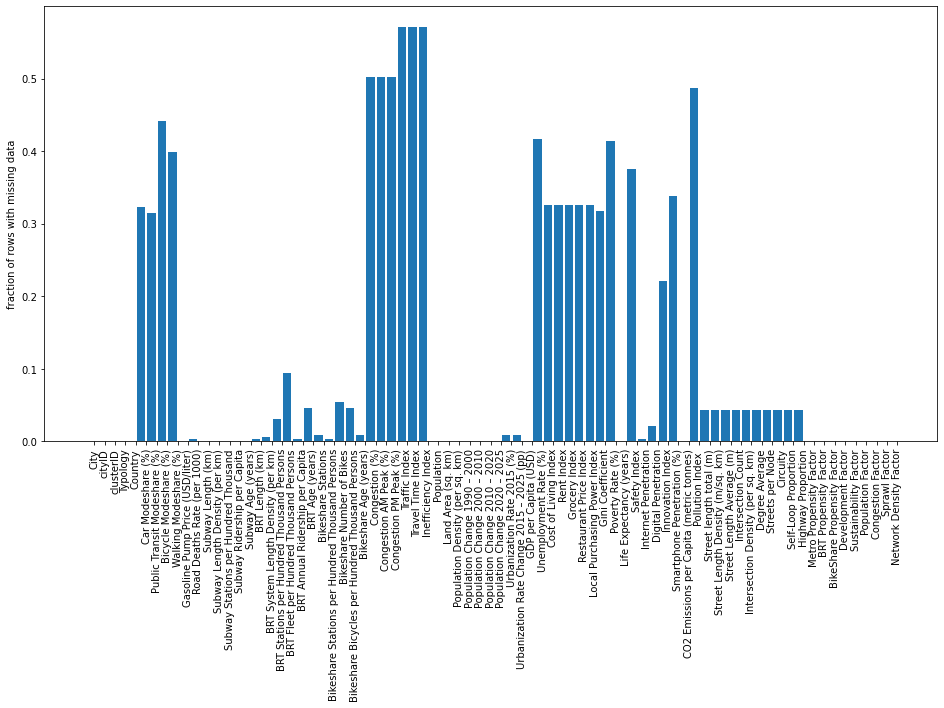

In [10]:
#Plotting the distribution of NaN values for the data set
# source: https://www.kaggle.com/cgump3rt/investigate-missing-values
null_counts = df.isnull().sum()/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

<BarContainer object of 78 artists>

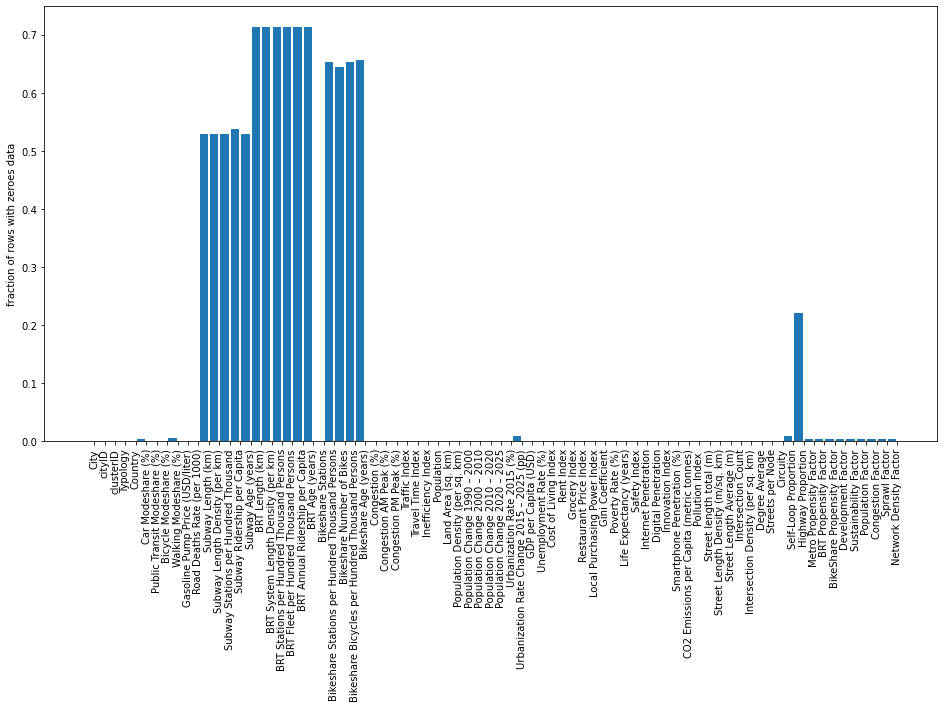

In [11]:
#Plotting the distribution of 0 values for the data set
#pd.set_option('display.max_rows', None)
zero_counts = df.isin([0]).sum()/len(df)

plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(zero_counts))+0.5,zero_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with zeroes data')
plt.bar(np.arange(len(zero_counts)),zero_counts)

## Correct data format

### Checking the types of the columns

In [12]:
pd.set_option('display.max_rows', None)
print(df.dtypes)

City                                                object
cityID                                               int64
clusterID                                            int64
Typology                                            object
Country                                             object
Car Modeshare (%)                                  float64
Public Transit Modeshare (%)                       float64
Bicycle Modeshare (%)                               object
Walking Modeshare (%)                              float64
Gasoline Pump Price (USD/liter)                    float64
Road Deaths Rate (per 1000)                        float64
Subway Length (km)                                 float64
Subway Length Density (per km)                     float64
Subway Stations per Hundred Thousand               float64
Subway Ridership per Capita                        float64
Subway Age (years)                                   int64
BRT Length (km)                                    float

As it appears from the list above some of the values are the wrong types - "Bicycle Modeshare (%)" and "Bikeshare Stations" appears as type: Object which should be type: float64. 
In order to check for others columns being in the wrong format we are creating a list with the columns which have the format "object".

In [13]:
#Get  columns whose data type is object i.e. string
filteredColumns = df.dtypes[df.dtypes == np.object]
# list of columns whose data type is object i.e. string
listOfColumnNames = list(filteredColumns.index)
print(listOfColumnNames)

['City', 'Typology', 'Country', 'Bicycle Modeshare (%)', 'Bikeshare Stations']


In [14]:
#printing the values
df['Bicycle Modeshare (%)']

0        0.3
1          2
2          2
3          2
4        NaN
5        0.5
6          3
7        NaN
8          1
9        NaN
10        11
11       NaN
12       NaN
13       0.8
14       NaN
15        12
16       2.7
17       0.2
18       0.7
19       NaN
20          
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
26      0.95
27       NaN
28       NaN
29         2
30       NaN
31         4
32       NaN
33        12
34       NaN
35         7
36         0
37         1
38       NaN
39       NaN
40       0.3
41       NaN
42       1.2
43        11
44       NaN
45       0.8
46         3
47       NaN
48       NaN
49       NaN
50       NaN
51       0.5
52       NaN
53       1.6
54       NaN
55       NaN
56        12
57       0.3
58       NaN
59       NaN
60         1
61       NaN
62       NaN
63         1
64        13
65        32
66       NaN
67       0.2
68       0.7
69         1
70       0.2
71        16
72      12.7
73       NaN
74       1.7
75       0.3
76       NaN

In [15]:
df['Bikeshare Stations']

0        50
1        50
2         0
3         0
4         0
5        28
6      1229
7         0
8        34
9         0
10        0
11        0
12        0
13       46
14        0
15        7
16        0
17        0
18      580
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26       31
27        0
28        0
29      215
30        0
31        0
32        0
33       29
34        0
35      NaN
36        0
37      424
38        0
39        0
40        0
41        0
42       80
43        0
44        0
45       65
46      102
47        0
48        0
49        0
50        0
51        0
52        0
53        0
54      156
55        0
56       30
57        0
58        0
59        0
60      140
61        0
62       10
63       19
64       50
65        0
66        0
67        0
68       83
69       55
70        0
71       13
72        0
73        0
74      447
75        0
76        0
77      718
78        0
79       40
80      NaN
81       35
82        0
83  

In [16]:
#Replacing every cells with NaN values that contains strings/object:
df['Bicycle Modeshare (%)'] = df['Bicycle Modeshare (%)'].replace(r'^\s*$', np.NaN, regex=True)
df['Bikeshare Stations'] = df['Bikeshare Stations'].replace(r'^\s*$', np.NaN, regex=True)

In [17]:
# correcting types of data: 
df[["Bicycle Modeshare (%)"]] = df[["Bicycle Modeshare (%)"]].astype("float64")
df[["Bikeshare Stations"]] = df[['Bikeshare Stations']].astype("float64")

In [18]:
pd.set_option('display.max_rows', None)
print(df.dtypes)

City                                                object
cityID                                               int64
clusterID                                            int64
Typology                                            object
Country                                             object
Car Modeshare (%)                                  float64
Public Transit Modeshare (%)                       float64
Bicycle Modeshare (%)                              float64
Walking Modeshare (%)                              float64
Gasoline Pump Price (USD/liter)                    float64
Road Deaths Rate (per 1000)                        float64
Subway Length (km)                                 float64
Subway Length Density (per km)                     float64
Subway Stations per Hundred Thousand               float64
Subway Ridership per Capita                        float64
Subway Age (years)                                   int64
BRT Length (km)                                    float

Columns are now the correct format for further analysis.

## Checking for outliers

## Selecting relevant columns 

### checking data for relevance

In [19]:
dummies = pd.get_dummies(df["Typology"])
df = pd.concat((df,dummies), axis = 1)
df = df.drop("Typology", axis = 1)
df.head()

,City,cityID,clusterID,Country,Car Modeshare (%),Public Transit Modeshare (%),Bicycle Modeshare (%),Walking Modeshare (%),Gasoline Pump Price (USD/liter),Road Deaths Rate (per 1000),...,BusTransit Dense,BusTransit Sprawl,Congested Boomer,Congested Emerging,Hybrid Giant,Hybrid Moderate,MassTransit Heavyweight,MassTransit Moderate,MetroBike Emerging,MetroBike Giant
0,Baltimore(MD),285,7,United States,85.0,6.1,0.3,2.6,0.66,8.5,...,0,0,0,0,0,0,0,0,0,0
1,Melbourne,10,8,Australia,80.0,14.0,2.0,4.0,1.11,5.4,...,0,0,0,0,0,0,0,0,0,0
2,Niamey,186,1,Niger,NaN,9.0,2.0,60.0,1.02,26.4,...,0,0,0,1,0,0,0,0,0,0
3,Hanoi,328,12,Vietnam,8.0,10.0,2.0,NaN,0.90,24.5,...,0,0,0,0,0,0,0,0,1,0
4,Urumqi,67,12,China,21.7,54.7,NaN,NaN,1.16,18.8,...,0,0,0,0,0,0,0,0,1,0


#### preliminary correlation for choosing relevance

In [20]:
x =  df.corr()
y = x["CO2 Emissions per Capita (metric tonnes)"].sort_values()
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(y)

Congestion Factor                                 -0.702860
Walking Modeshare (%)                             -0.558524
Population Density (per sq. km)                   -0.531781
Pollution Index                                   -0.490957
Public Transit Modeshare (%)                      -0.485834
Congestion AM Peak (%)                            -0.473027
Congested Emerging                                -0.448156
Congestion (%)                                    -0.439668
Congestion PM Peak (%)                            -0.386783
Road Deaths Rate (per 1000)                       -0.333807
Population Factor                                 -0.328847
Travel Time Index                                 -0.310388
Urbanization Rate Change 2015 – 2025 (pp)         -0.304620
Population Change 2020 – 2025                     -0.300723
Traffic Index                                     -0.229211
Unemployment Rate (%)                             -0.226556
Congested Boomer                        

## Standardize data

#### Normalizing the data

In [21]:
df=df.drop(columns=['City', 'cityID','clusterID','Country'])
df.head()

,Car Modeshare (%),Public Transit Modeshare (%),Bicycle Modeshare (%),Walking Modeshare (%),Gasoline Pump Price (USD/liter),Road Deaths Rate (per 1000),Subway Length (km),Subway Length Density (per km),Subway Stations per Hundred Thousand,Subway Ridership per Capita,...,BusTransit Dense,BusTransit Sprawl,Congested Boomer,Congested Emerging,Hybrid Giant,Hybrid Moderate,MassTransit Heavyweight,MassTransit Moderate,MetroBike Emerging,MetroBike Giant
0,85.0,6.1,0.3,2.6,0.66,8.5,24.9,0.013409,0.615385,6.417582,...,0,0,0,0,0,0,0,0,0,0
1,80.0,14.0,2.0,4.0,1.11,5.4,0.0,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,NaN,9.0,2.0,60.0,1.02,26.4,0.0,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,0,0,0
3,8.0,10.0,2.0,NaN,0.90,24.5,0.0,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0
4,21.7,54.7,NaN,NaN,1.16,18.8,0.0,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,1,0


#### Prescaling the street length density.

The prescaling is done to allow for preprocessing without failure due to high values. The street length density seems to have an error, this error is viewed as a scaling error in respect to the total street length and assumedly the area of the city.

In [22]:
df['Street Length Density (m/sq. km)'] = df['Street Length Density (m/sq. km)']/10e6

In [23]:
df_scaled = pd.DataFrame(preprocessing.scale(df),
                        columns = df.columns,
                        index = range(0,331))

df_scaled.head()

## Checking for Outliers

In [ ]:
df_scaled1 = df_scaled[df_scaled.columns[0:28]]
df_scaled2 = df_scaled[df_scaled.columns[28:56]]
df_scaled3 = df_scaled[df_scaled.columns[56:85]]

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 28 Text major ticklabel objects>)

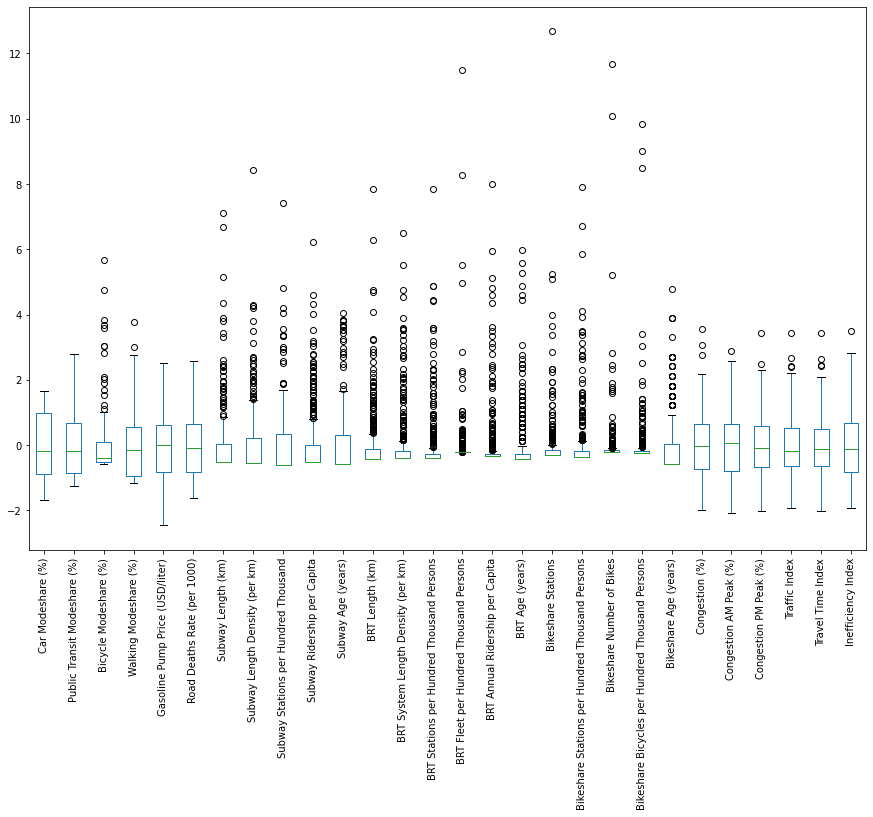

In [70]:
df_scaled1.plot(kind='box', figsize=(15, 10))
plt.xticks(rotation='vertical')

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 28 Text major ticklabel objects>)

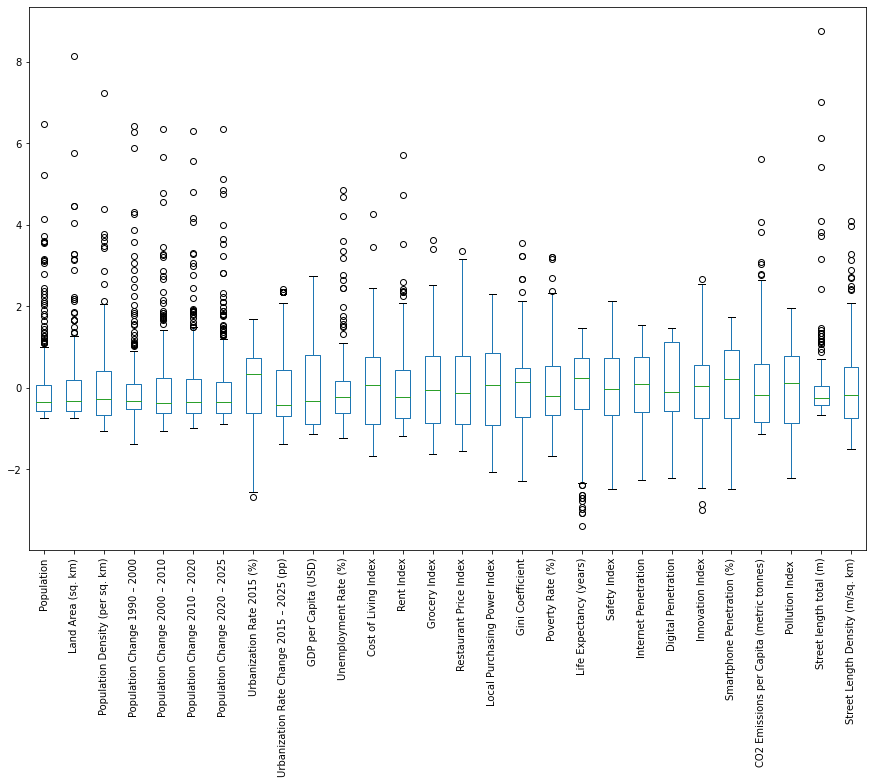

In [67]:
df_scaled2.plot(kind='box', figsize=(15, 10))
plt.xticks(rotation='vertical')

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 29 Text major ticklabel objects>)

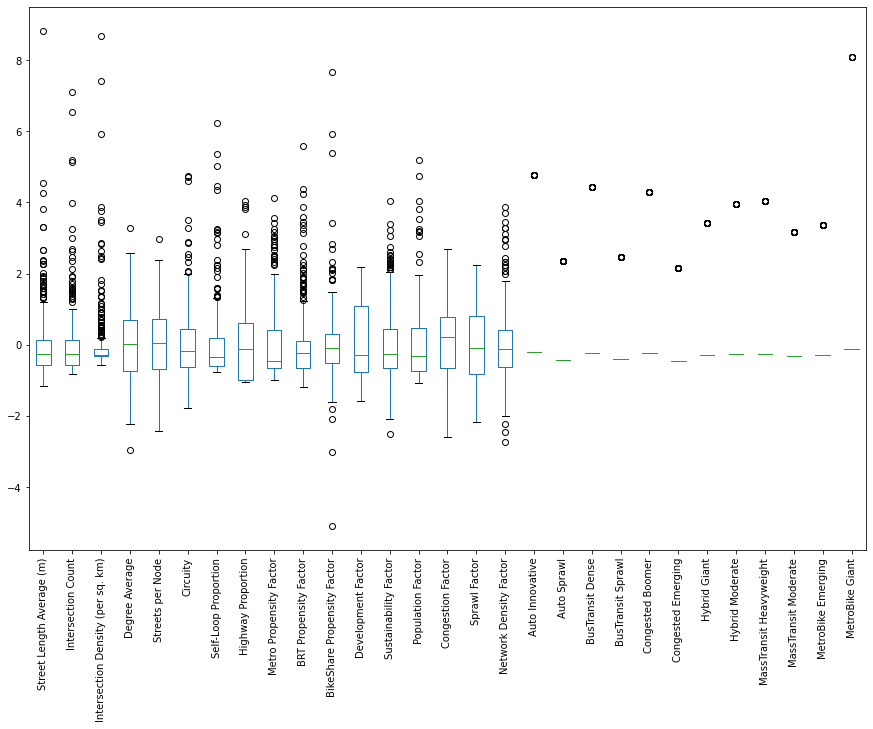

In [68]:
df_scaled3.plot(kind='box', figsize=(15, 10))
plt.xticks(rotation='vertical')


7.39787944673716

,Hybrid Moderate,MassTransit Heavyweight,MassTransit Moderate,MetroBike Emerging,MetroBike Giant
0,-0.253592,-0.246774,-0.315702,-0.298020,-0.123844
1,-0.253592,-0.246774,-0.315702,-0.298020,-0.123844
2,-0.253592,-0.246774,-0.315702,-0.298020,-0.123844
3,-0.253592,-0.246774,-0.315702,3.355482,-0.123844
4,-0.253592,-0.246774,-0.315702,3.355482,-0.123844


## Dealing with the NaN values and "0" values 

#### Calculate the average of the column

In [25]:
#avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
#print("Average of normalized-losses:", avg_norm_loss)

#### Replace "NaN" by mean value in "normalized-losses" column

In [26]:
#df["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

#### Replace NaN by mean value

In [27]:
#df["bore"].replace(np.nan, avg_bore, inplace=True)

## Validation of selected columns - what and how much do we lose 

## Checking correlation for the selected columns 

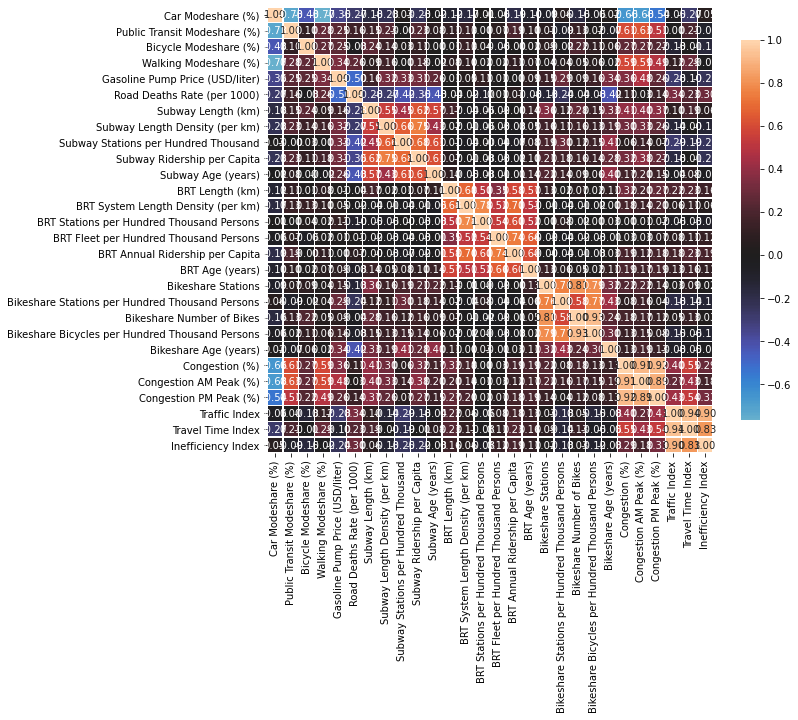

In [76]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#df.corr()



def correlation_heatmap(x):
    correlations = x.corr()
    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(df_scaled1)

## Heatmap correlation

In [29]:
#Source: https://towardsdatascience.com/why-feature-correlation-matters-a-lot-847e8ba439c4

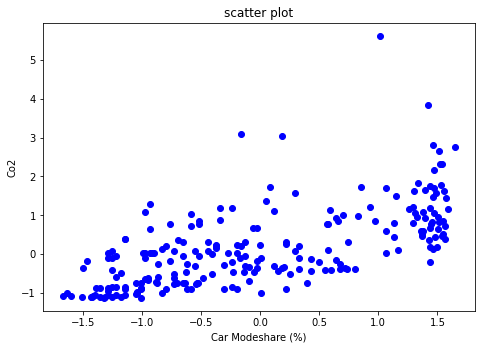

In [89]:
#df.set_index("CO2 Emissions per Capita (metric tonnes)").plot(figsize=(15, 10))


fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df_scaled["Car Modeshare (%)"], df_scaled["CO2 Emissions per Capita (metric tonnes)"], color='b')
ax.set_xlabel('Car Modeshare (%)')
ax.set_ylabel('Co2')
ax.set_title('scatter plot')
plt.show()

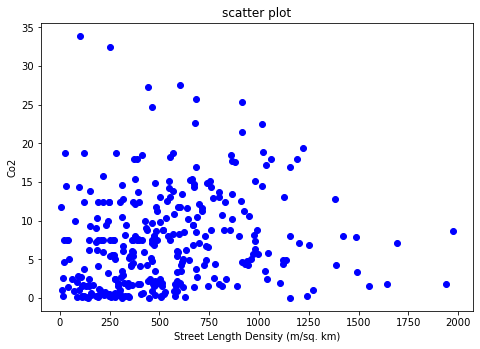

In [92]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df["Street Length Density (m/sq. km)"], df["CO2 Emissions per Capita (metric tonnes)"], color='b')
ax.set_xlabel('Street Length Density (m/sq. km)')
ax.set_ylabel('Co2')
ax.set_title('scatter plot')
plt.show()

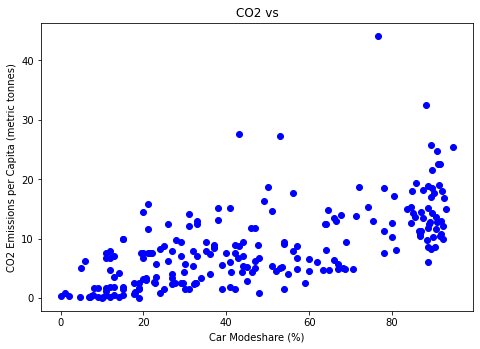

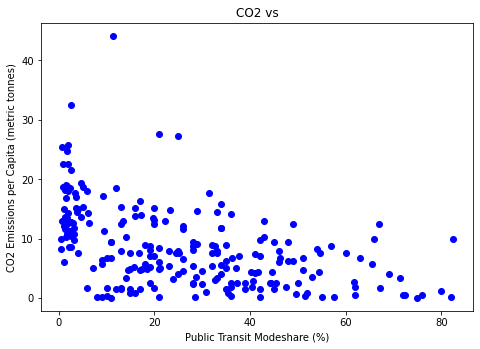

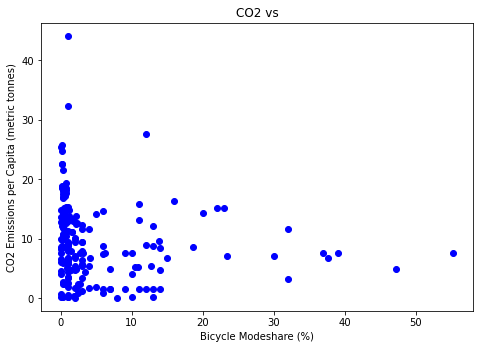

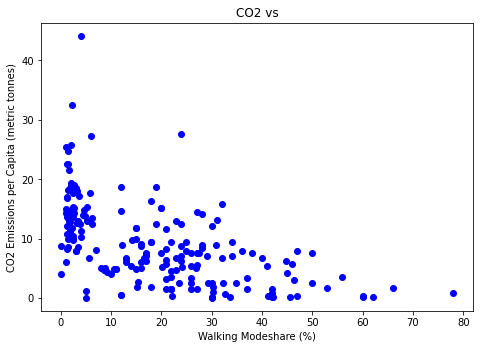

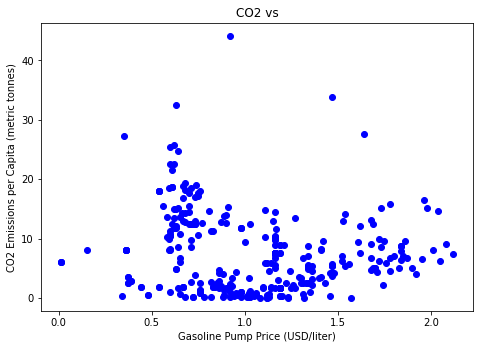

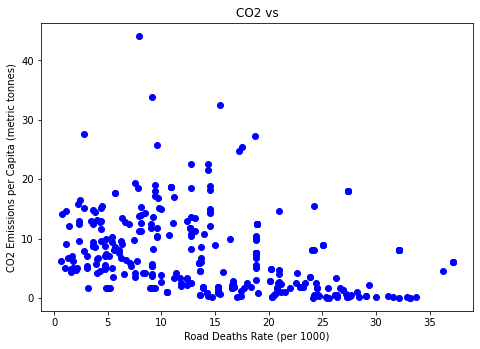

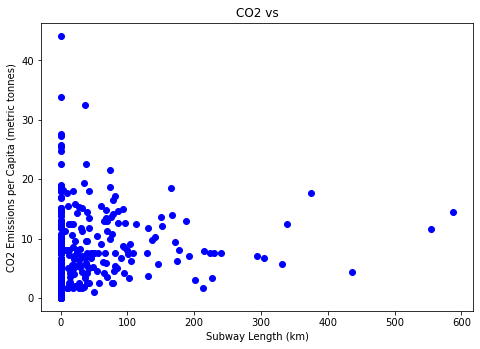

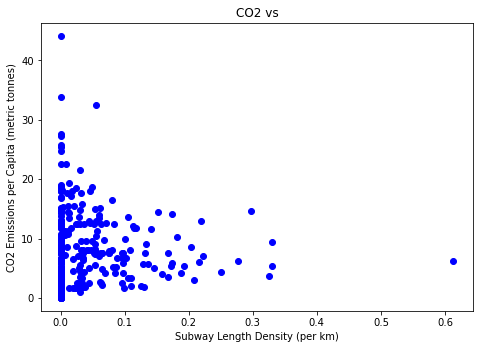

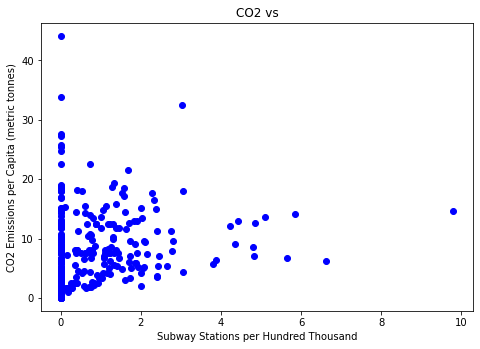

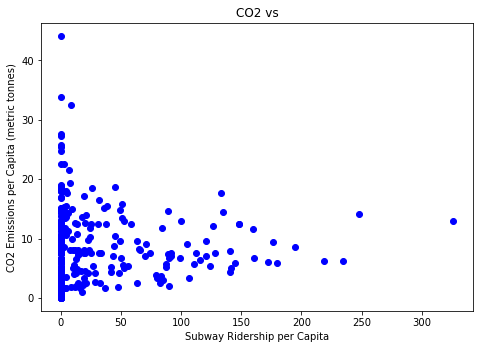

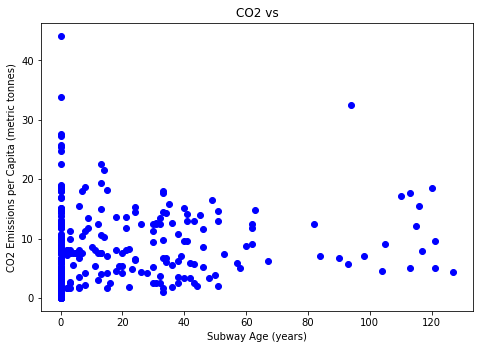

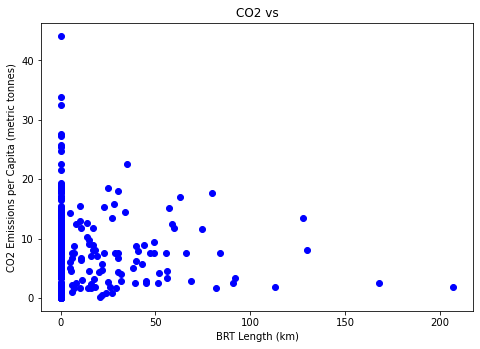

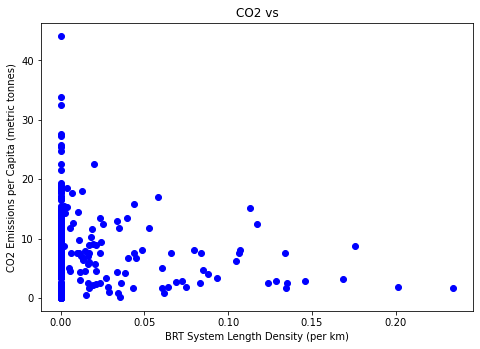

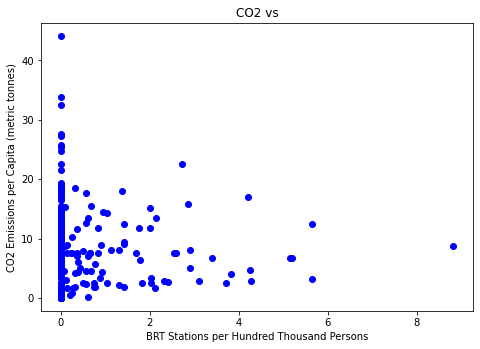

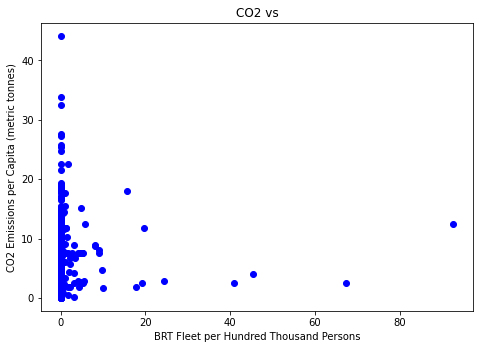

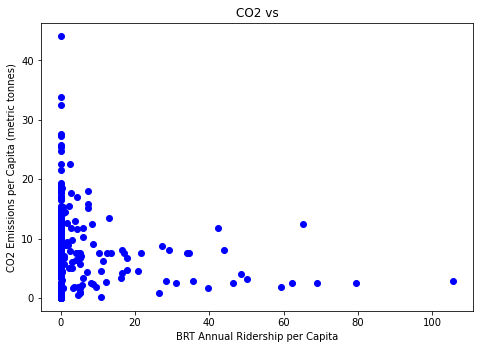

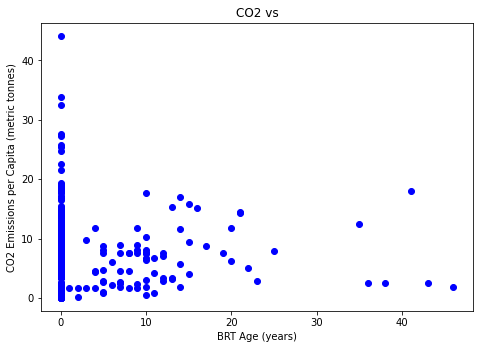

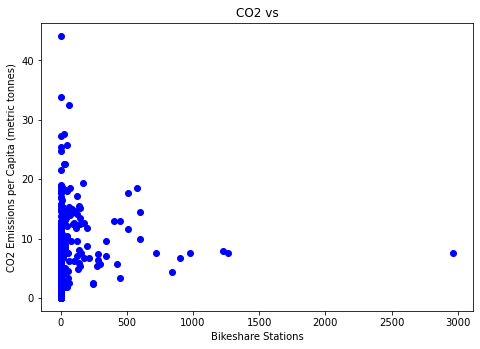

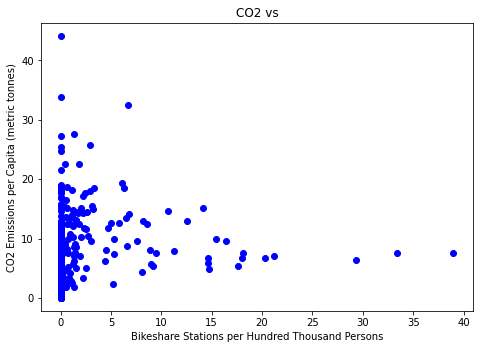

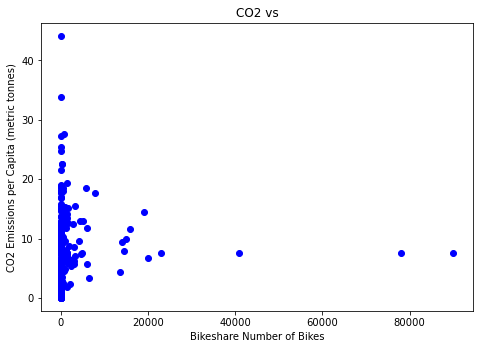

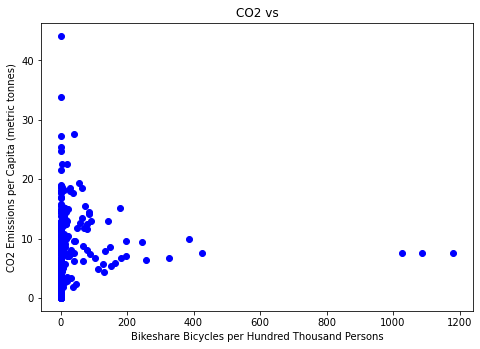

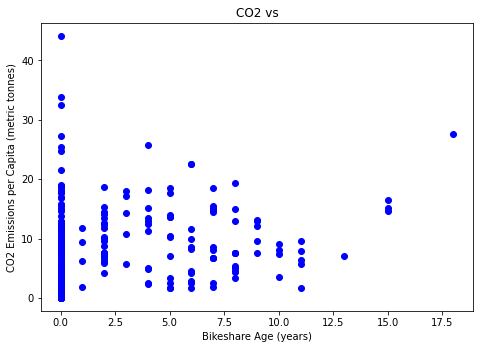

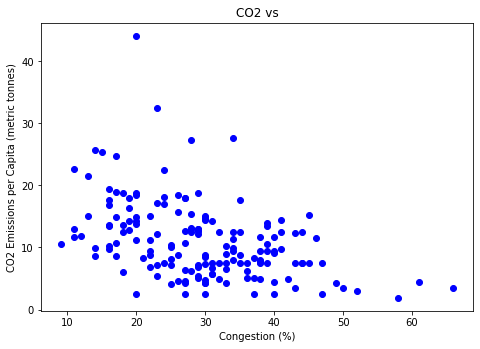

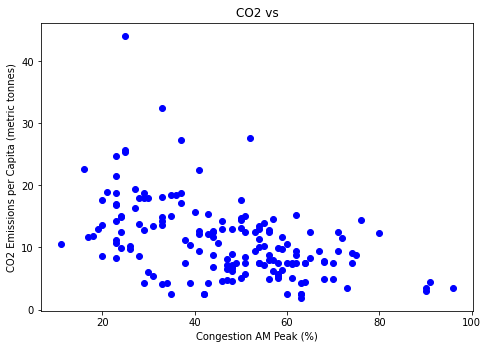

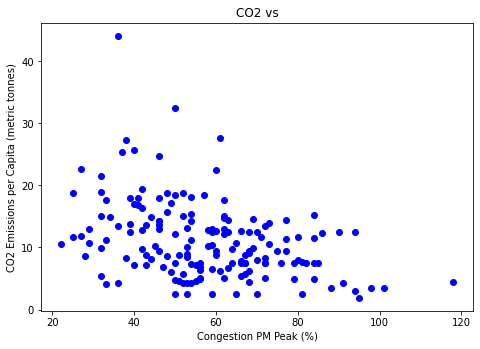

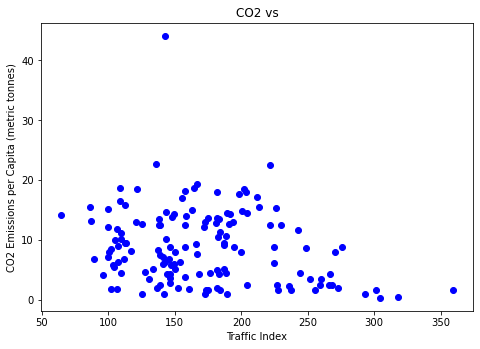

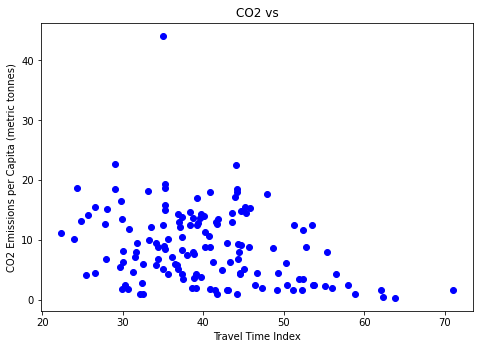

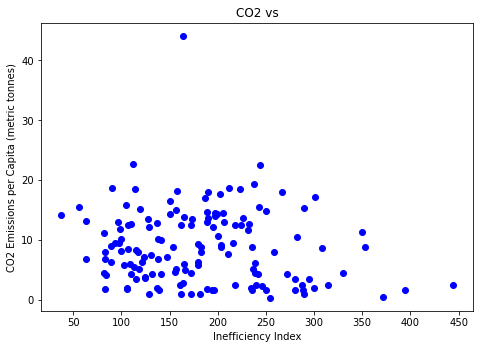

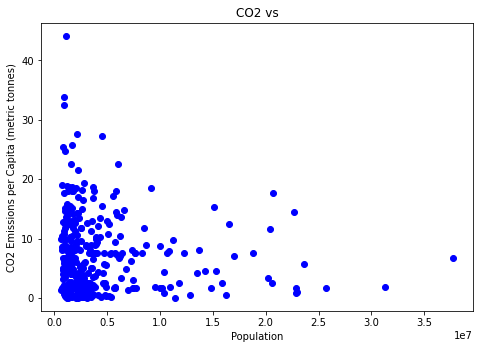

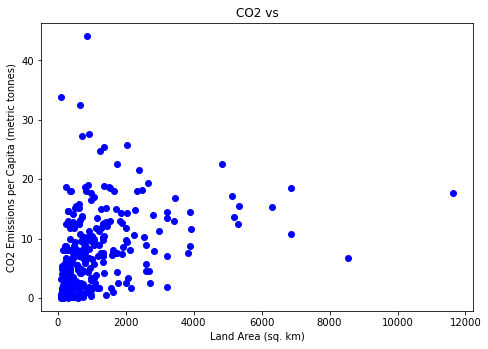

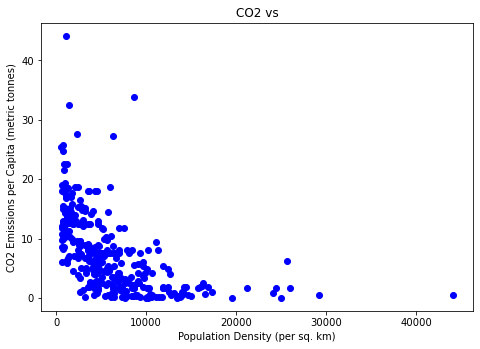

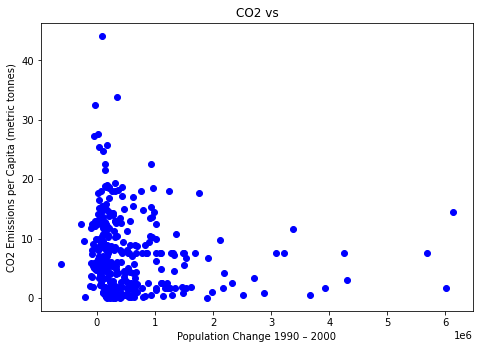

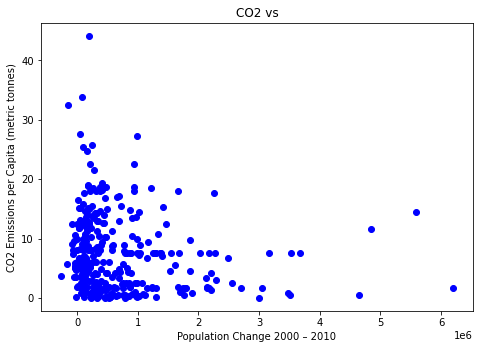

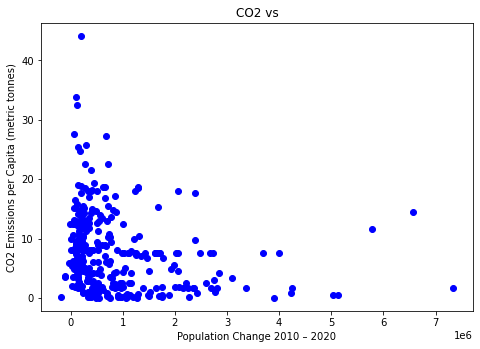

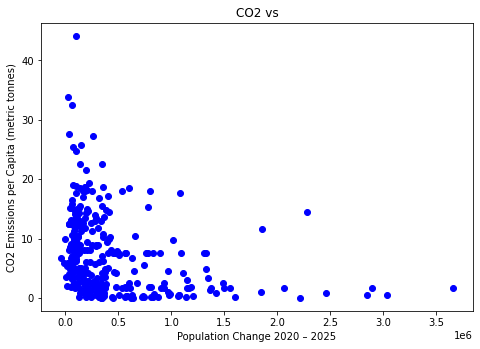

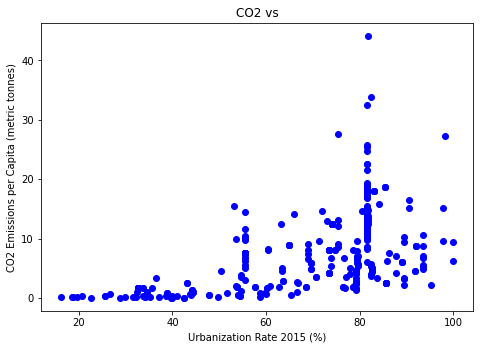

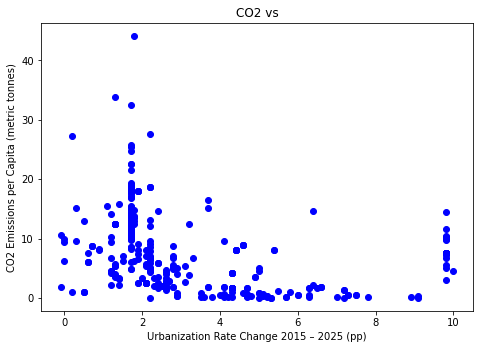

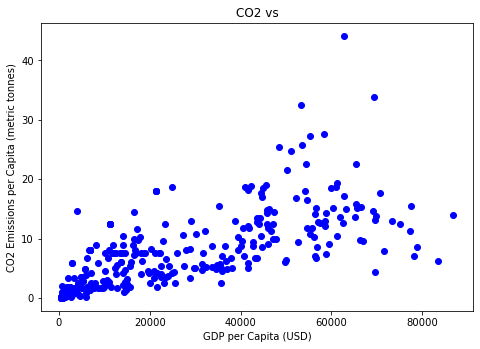

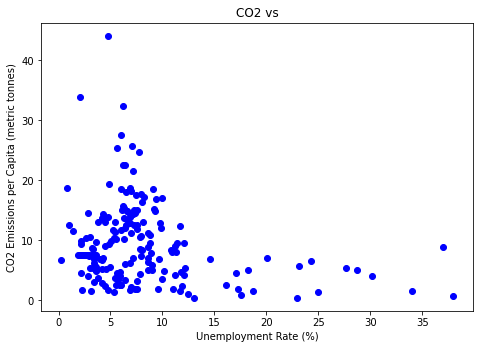

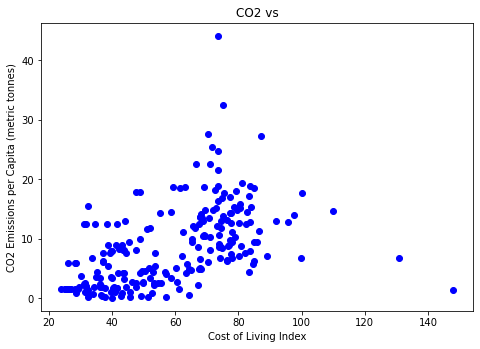

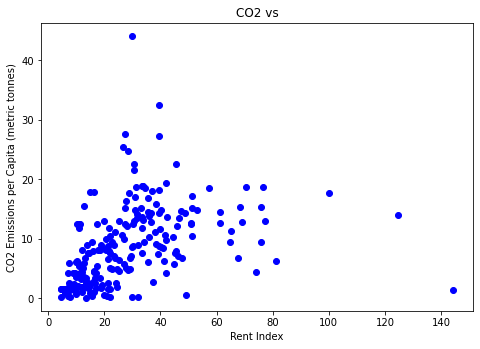

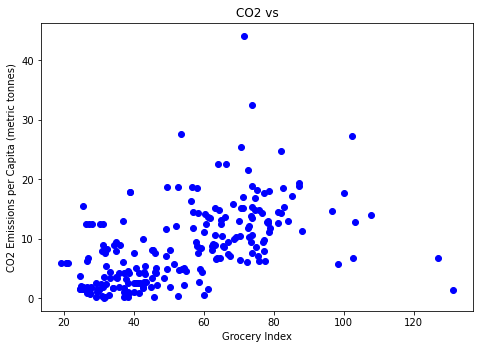

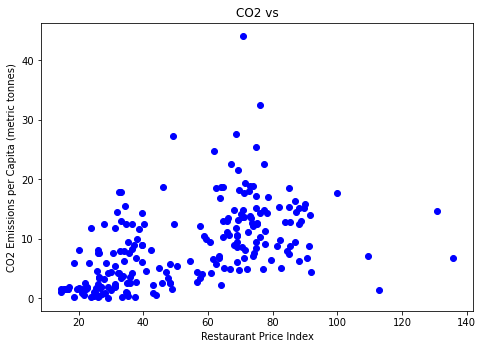

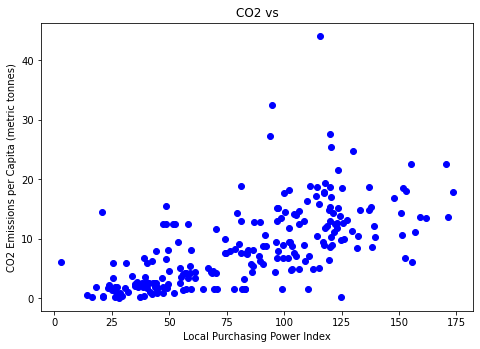

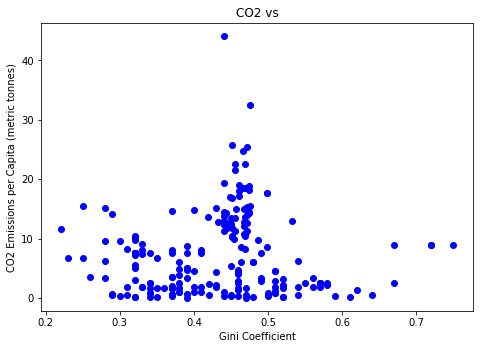

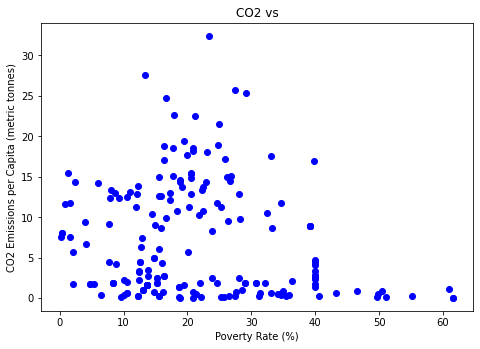

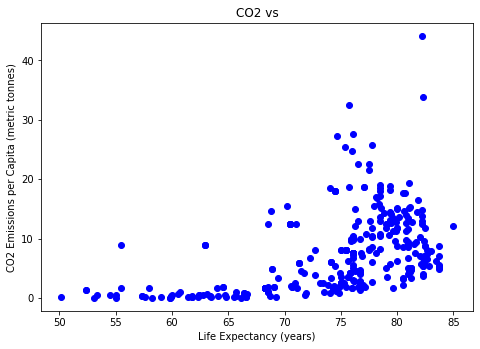

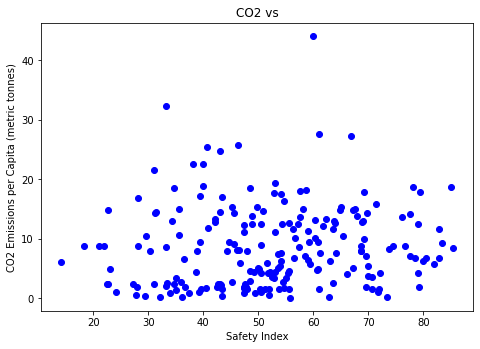

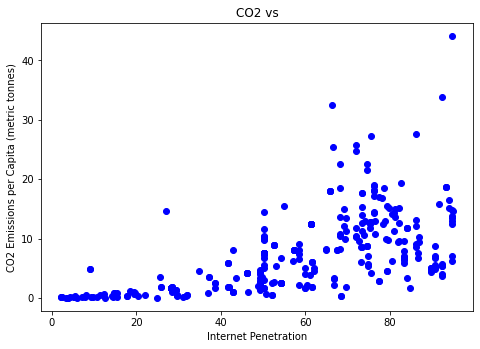

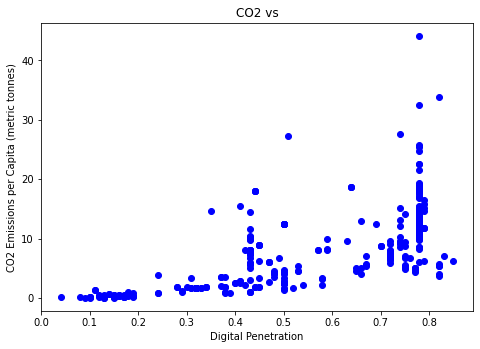

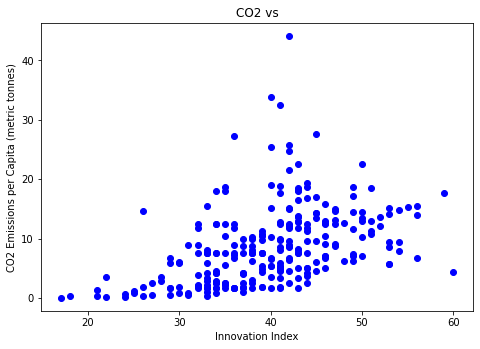

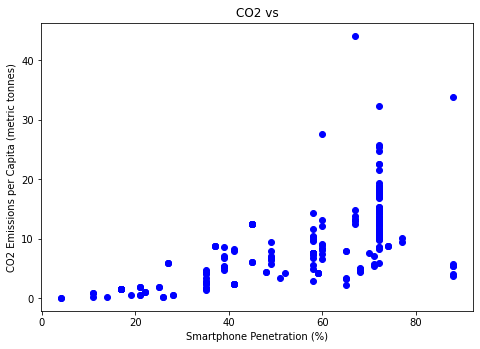

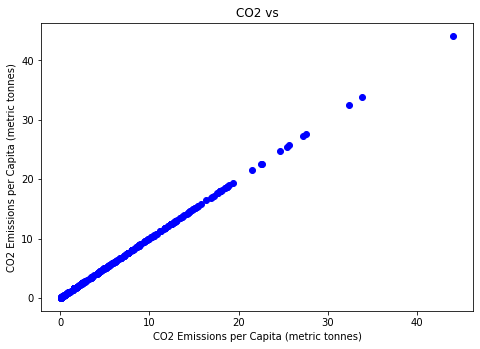

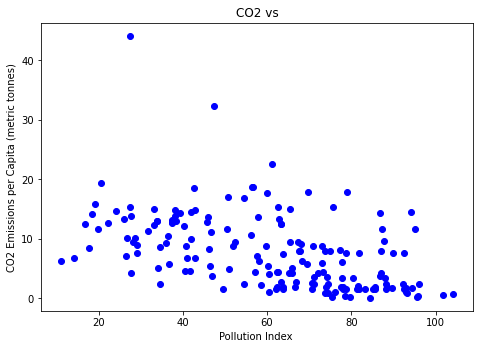

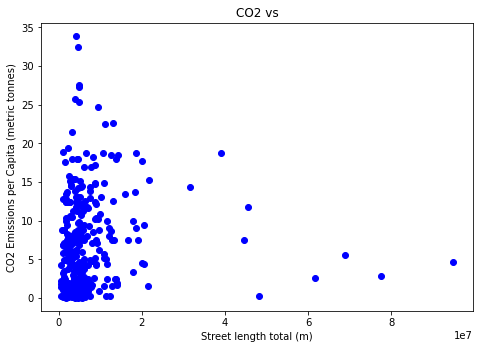

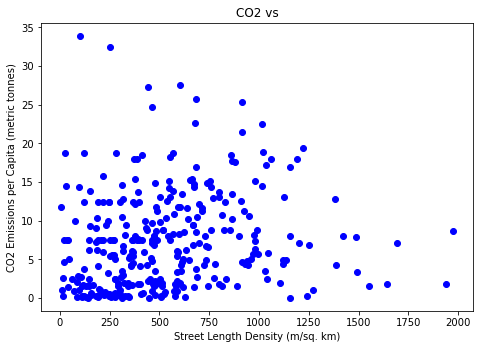

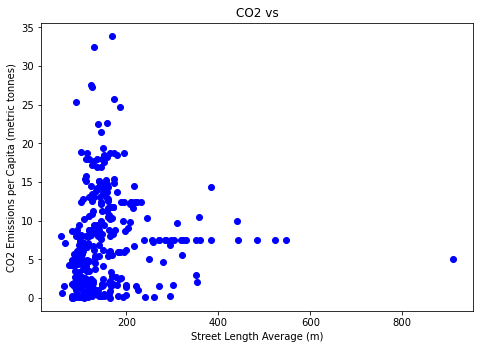

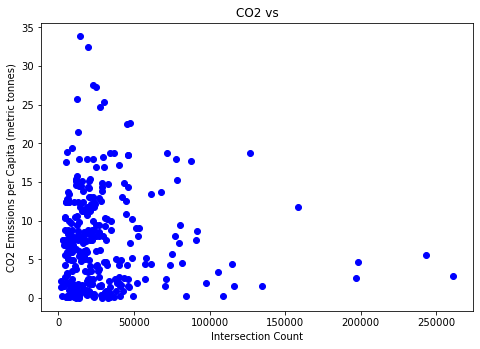

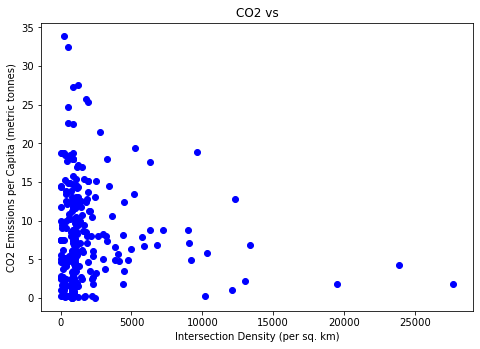

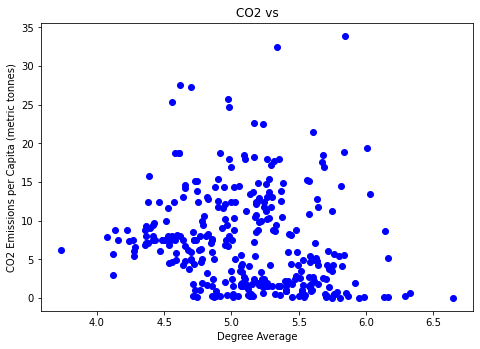

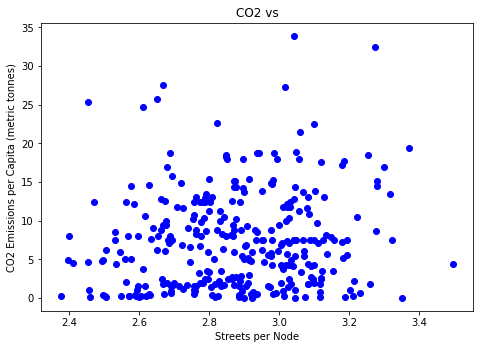

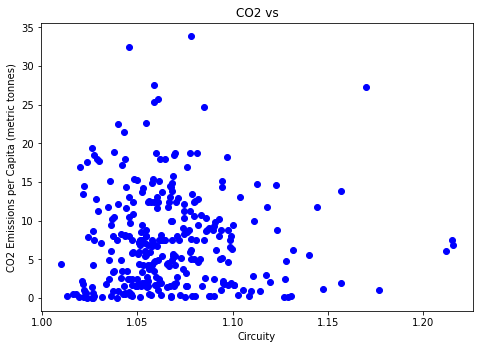

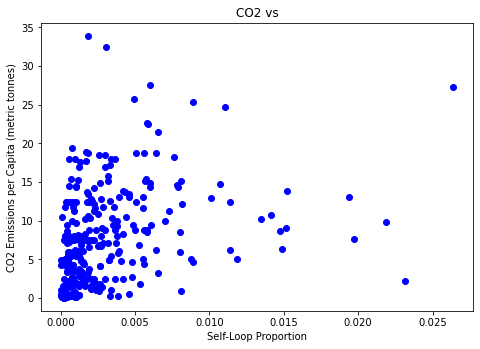

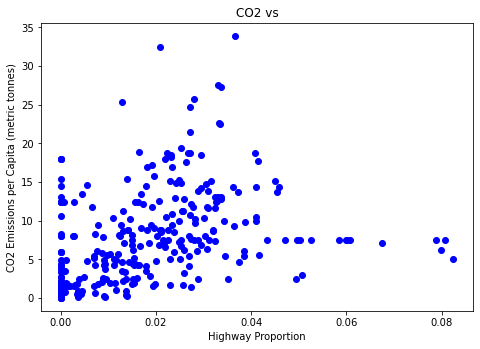

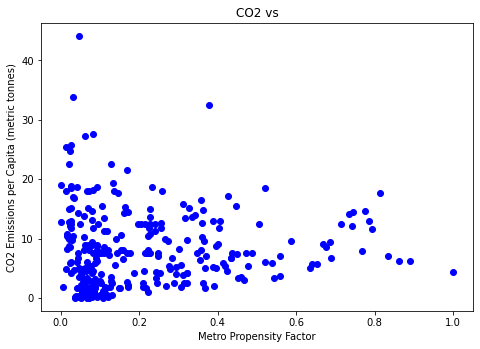

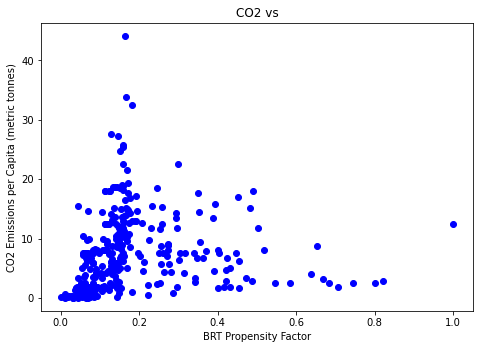

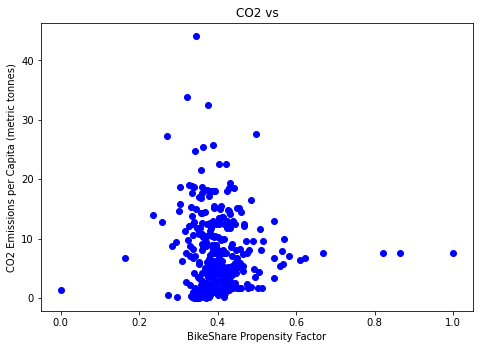

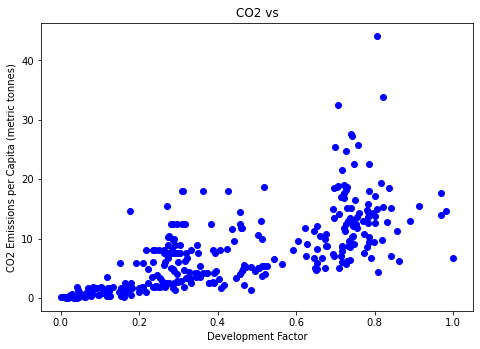

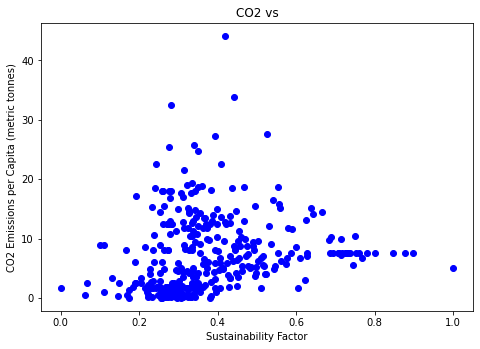

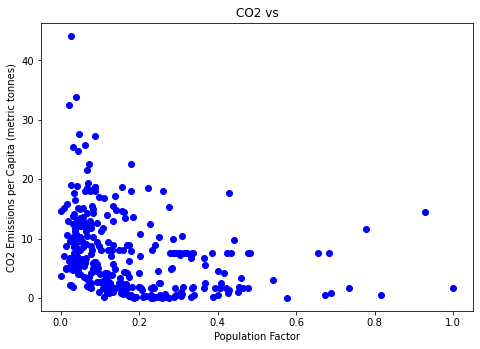

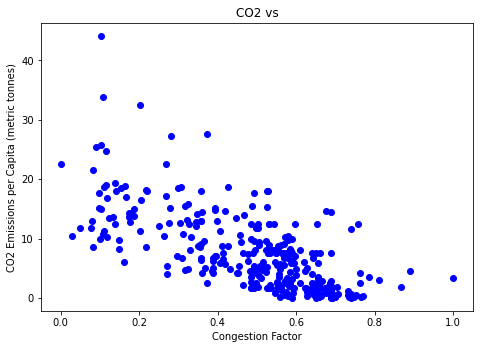

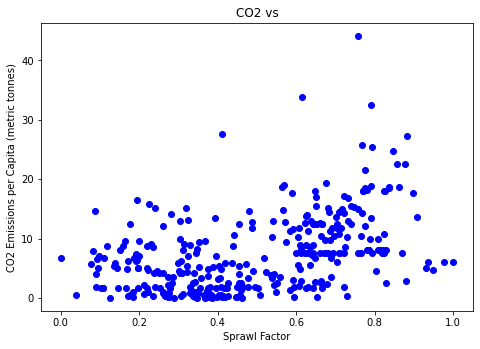

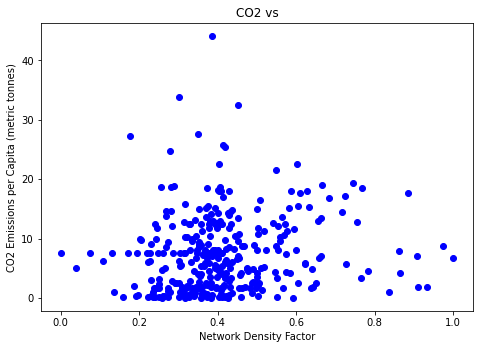

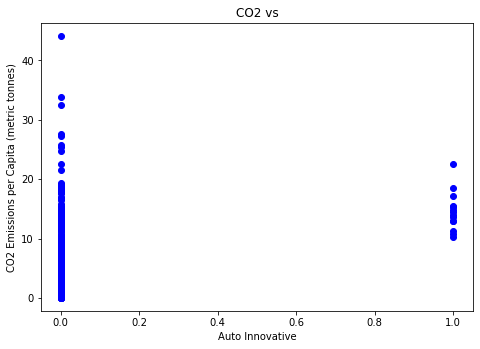

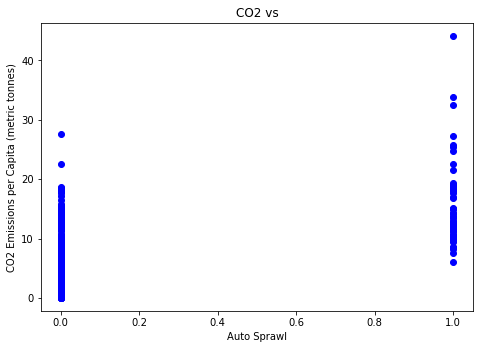

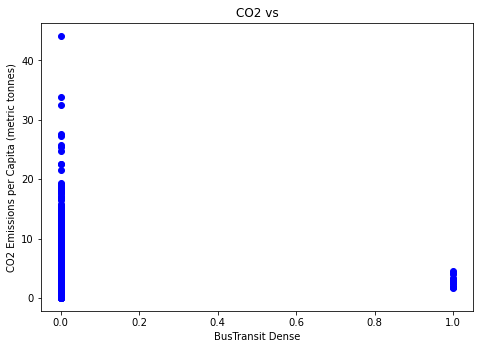

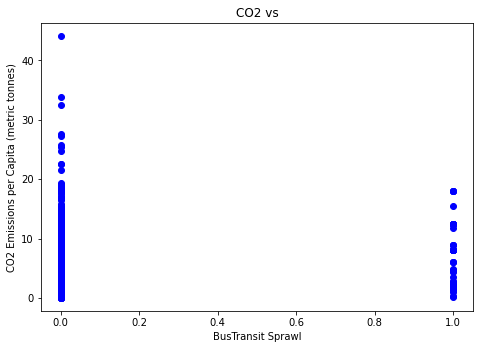

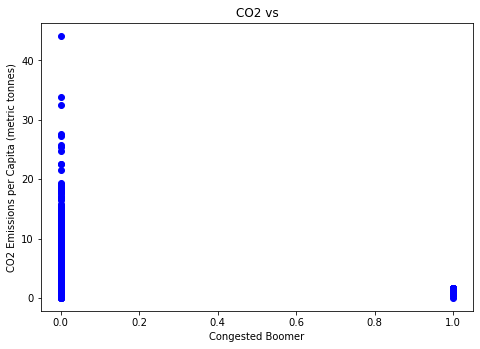

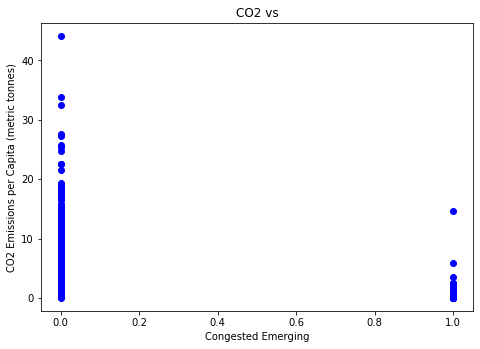

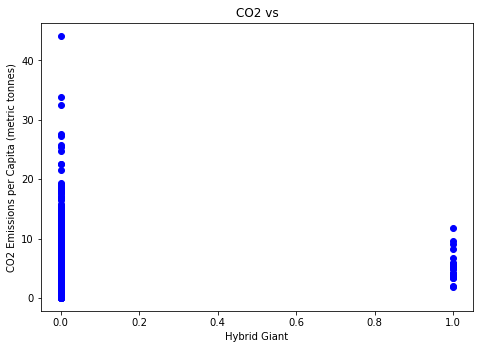

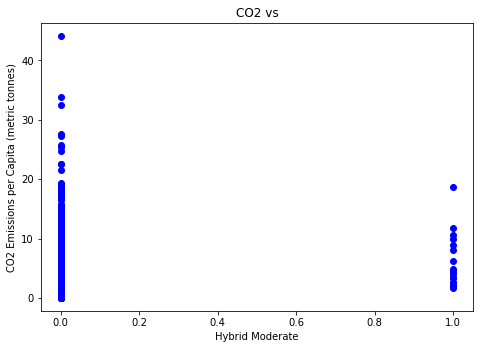

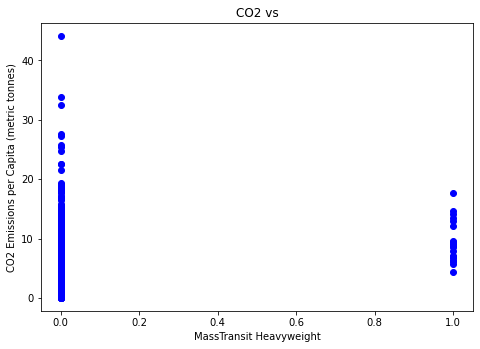

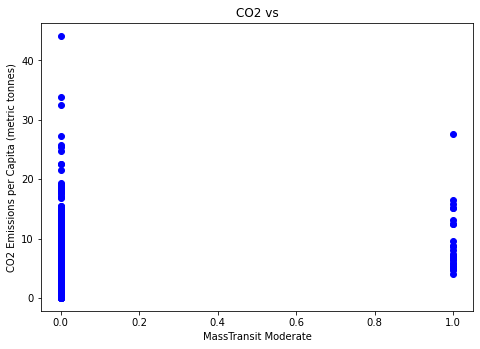

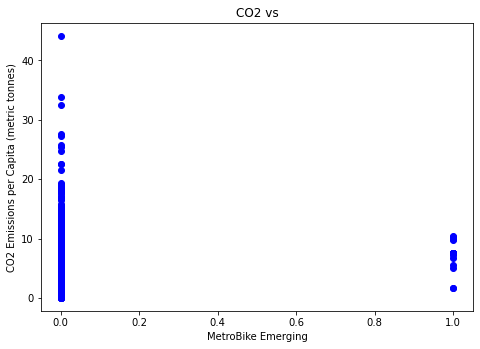

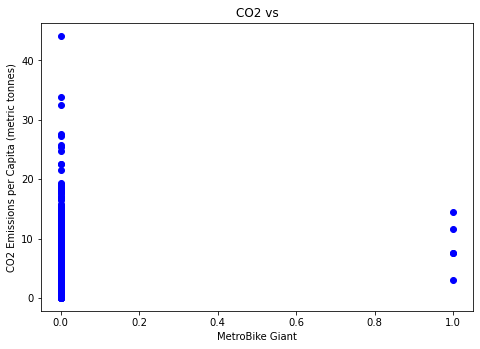

In [97]:
for i in df.columns:
    fig = plt.figure()
    ax=fig.add_axes([0,0,1,1])
    ax.scatter(df[i], df["CO2 Emissions per Capita (metric tonnes)"], color='b')
    ax.set_xlabel(i)
    ax.set_ylabel('CO2 Emissions per Capita (metric tonnes)')
    ax.set_title("CO2 vs",)
    plt.show()

Car mode share displays good correlation with CO2
Public transport also good
Bicycle modeshare couold be problematic because of 0s
Walking modeshare good
Gasoline pump price looks interesting with a couple of cluster (?)
Road deaths rate good decline
Subway length is weird
Bikeshare age (years) nonlinear?